# Image Masking with OpenCV
* 이미지처리에서 가장 많이 사용하는 연산은 비트연산(Bitwiase arithmetics)
* 대상이 되는 오브젝트에서 관심영역(Region of Interest)을 도형으로 Mask해서 추출하는 이미지 처리 기술
* 다른 이미지 마스킹 응용 프로그램은 알파 블렌딩 및 투명도


### 이미지 다운로드 

In [1]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-masking/opencv-masking.zip
!unzip -qq opencv-masking.zip
%cd opencv-masking

--2021-04-20 07:12:46--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-masking/opencv-masking.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.183.42
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.183.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 338523 (331K) [application/zip]
Saving to: ‘opencv-masking.zip’

opencv-masking.zip  100%[===================>] 330.59K  --.-KB/s    in 0.06s   

2021-04-20 07:12:47 (5.57 MB/s) - ‘opencv-masking.zip’ saved [338523/338523]

/content/opencv-masking


## 코드 기술 및 수행

### 패키지 임포트

In [8]:
# import the necessary packages
from matplotlib import pyplot as plt
import numpy as np
import argparse
import cv2

### Function to display images in Jupyter Notebooks and Google Colab

In [23]:
def plt_imshow(title, image):
  """
  전달받은 이미지를 BGR프레임에서 RGB프레임으로 변환 후 화면에서 표출
  """
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.title(title)
  plt.imshow(image)
  plt.grid(False)
  plt.show()

### OpenCV를 이용한 이미지 연산
* Image Cropping부분 참조
* 

In [20]:
# 파이썬 스크립트를 터미널에서 수행시 사용
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", type=str, default="grand_canyon.png",
# 	help="path to the input image")
# args = vars(ap.parse_args())

# 쥬피터 혹은 코랩에서 사용시 
args = {
	"image": "adrian.png"
}

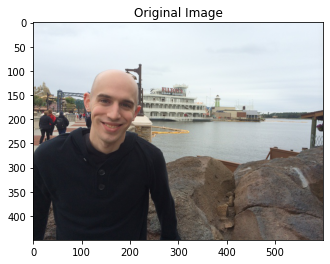

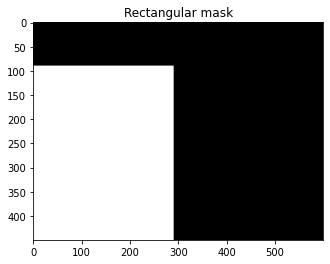

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)

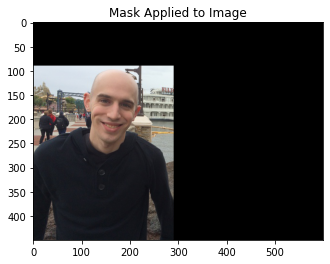

In [24]:
# 1.이미지 로드 
image = cv2.imread(args['image'])
plt_imshow("Original Image", image)


# 2.위의 이미지와 동일한 width, height, channel로 ndarray배열 초기화
mask = np.zeros(image.shape[:2], dtype='uint8') # 원래 이미지와 동일한 너비와 높이로 0으로 채운 넘파일 배열 생성

# 캔버스의 왼쪽 모서리영역에서 사람 이미지 부분까지 직사각형 
# 255는 흰색, 0은 검정색
cv2.rectangle(mask,(0, 90), (290, 450), 255, -1)   # pt1 : (width, height), pt2 : (width, height), 색깔 :255(흰색) , -1 : 색깔채움
plt_imshow("Rectangular mask", mask)
display(mask)
# apply our mask -- notice how only the person in the image is
# cropped out

# 처음 두 매개 변수는 영상 자체 (즉, 비트 연산을 적용하려는 이미지)
masked = cv2.bitwise_and(image, image, mask=mask)
plt_imshow("Mask Applied to Image", masked)

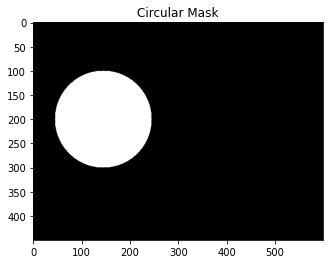

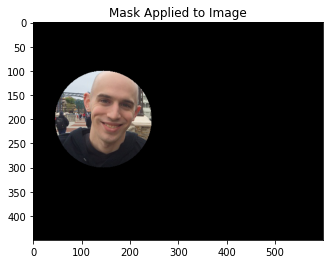

In [25]:
# 반지름이 100인 원을 얼굴 주위에 그리기
# 마스크 적용
mask = np.zeros(image.shape[:2], dtype='uint8')
cv2.circle(mask, (145, 200), 100, 255, -1)
masked = cv2.bitwise_and(image, image, mask = mask)

# 마스크가 적용된 이미지
plt_imshow("Circular Mask", mask)
plt_imshow("Mask Applied to Image", masked)